In [2]:
import uncertainties.unumpy as unp
import uncertainties as u

from uncertainties import ufloat
import numpy as np
import pandas as pd
import scipy as sp
import kafe2
import matplotlib.pyplot as plt

import sympy

from pathlib import Path

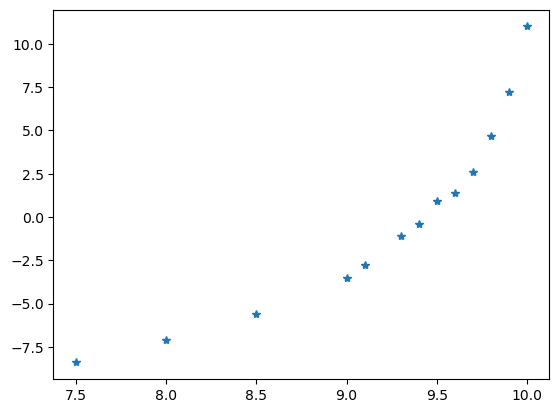

In [3]:
p_i=np.array([[10.0,2.0*10-9], [9.5,0.99*10-9], [9.0, 0.55*10-9], [8.5, 0.34*10-9], [8.0, 0.19*10-9], [7.5, 0.06*10-9], [9.1, 0.62*10-9],  [9.3, 0.79*10-9], [9.4, 0.86*10-9], [9.6,  1.04*10-9], [9.7, 1.16*10-9], [9.8, 1.37*10-9], [9.9, 1.62*10-9]])

plt.plot(p_i[:,0], p_i[:,1],"*")
plt.show()

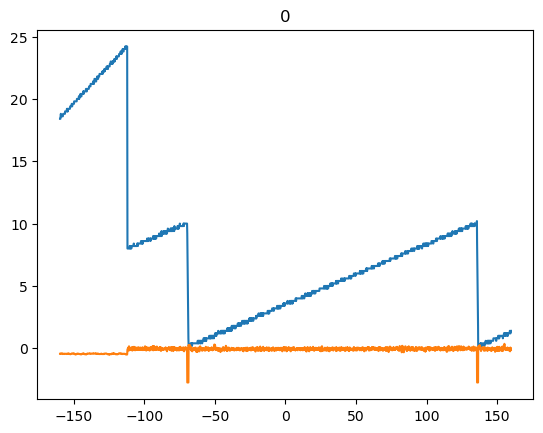

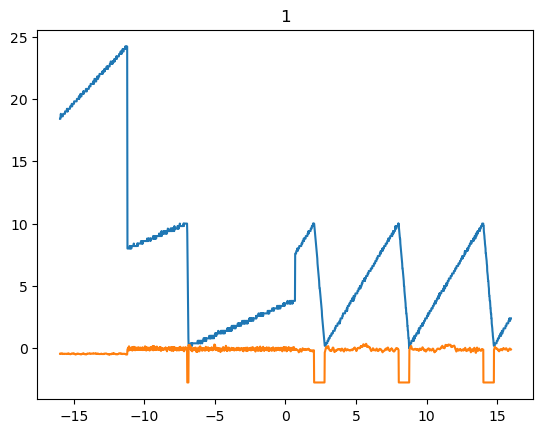

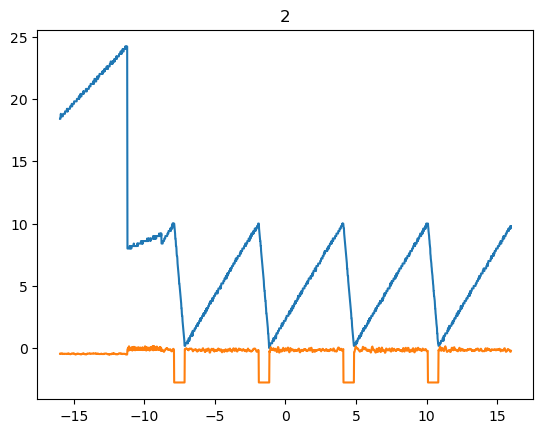

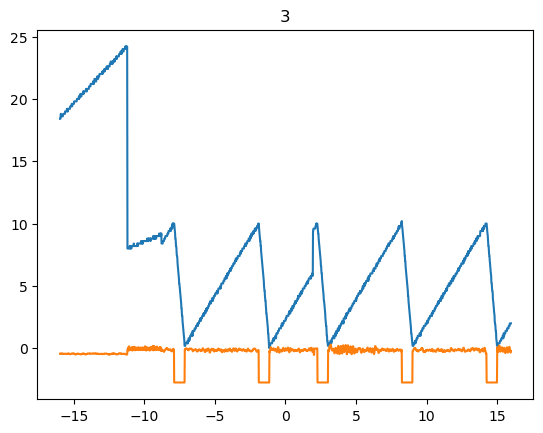

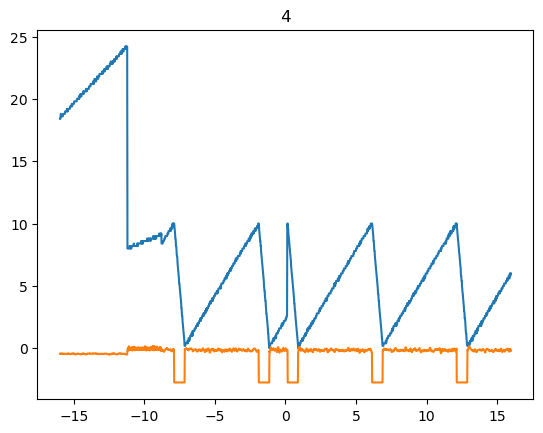

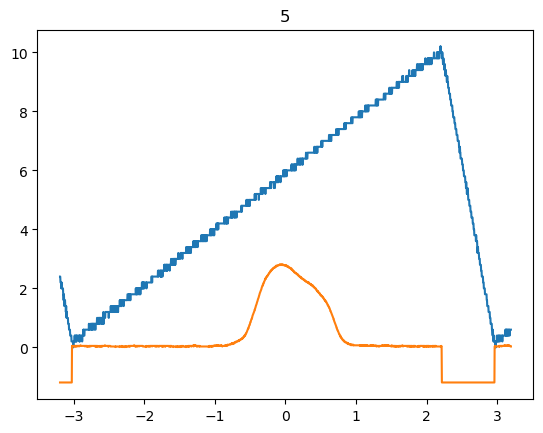

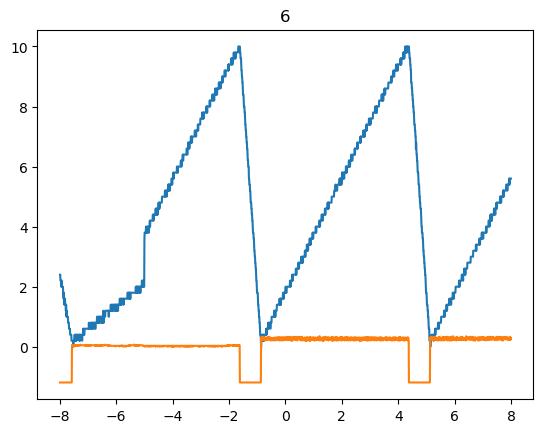

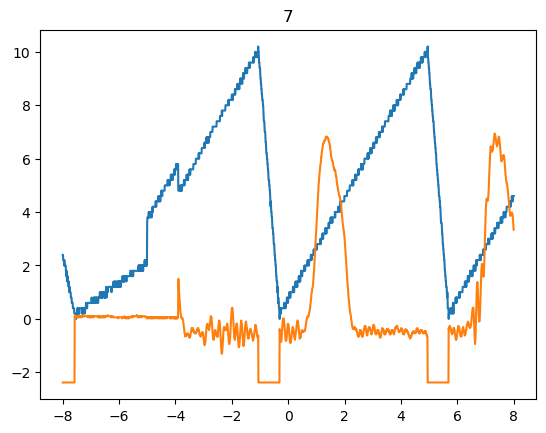

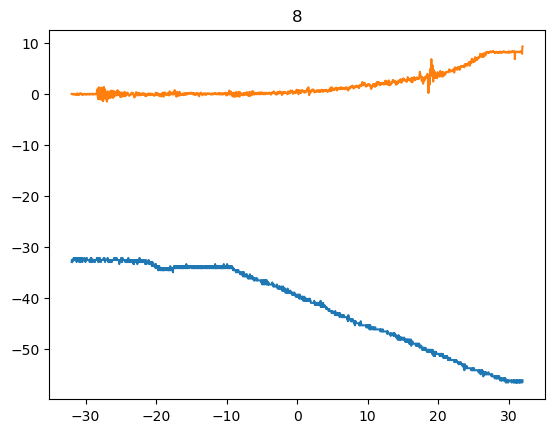

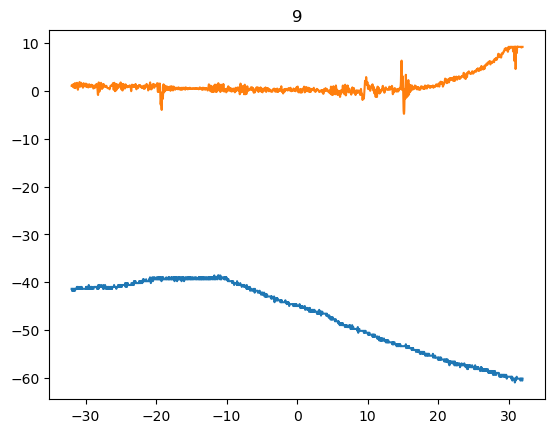

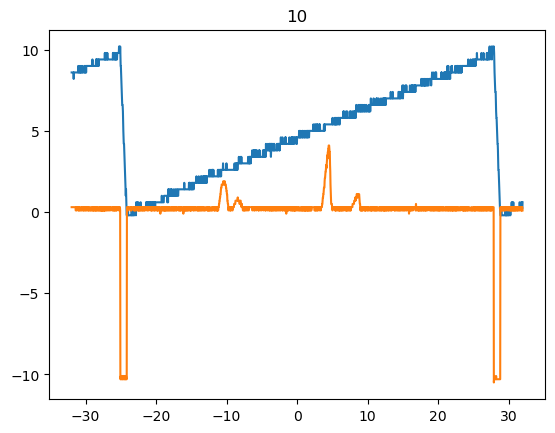

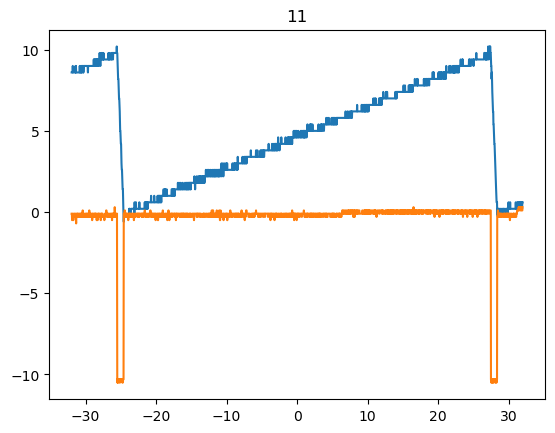

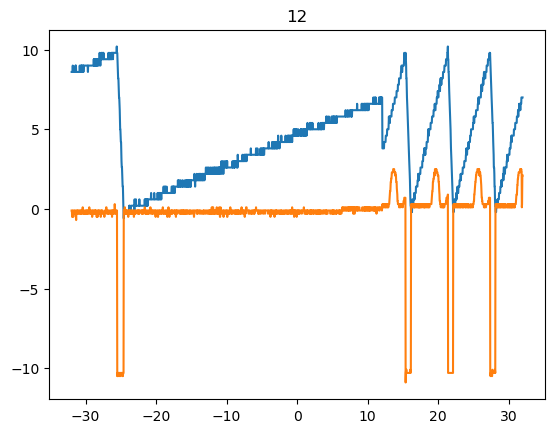

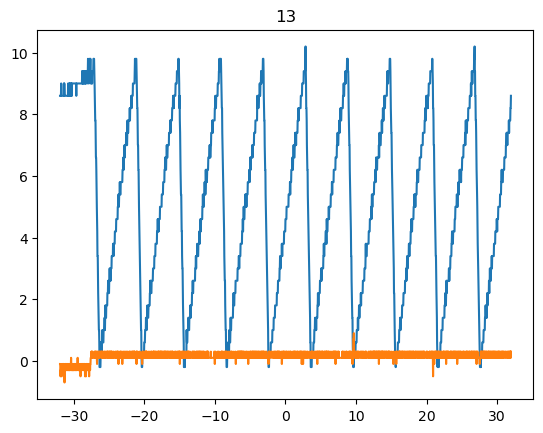

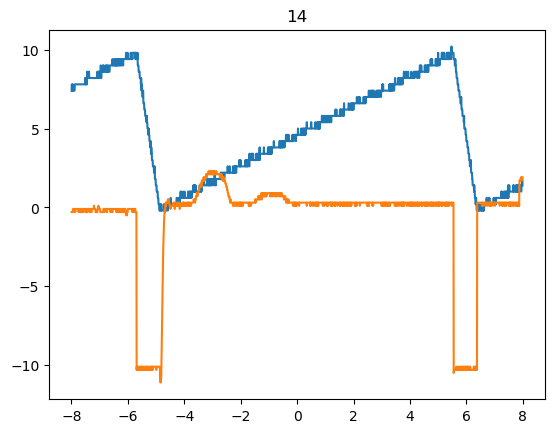

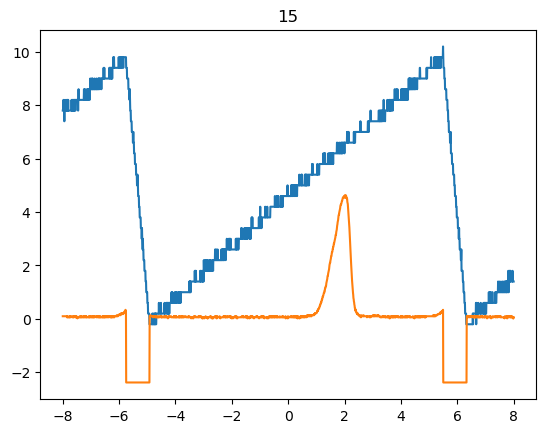

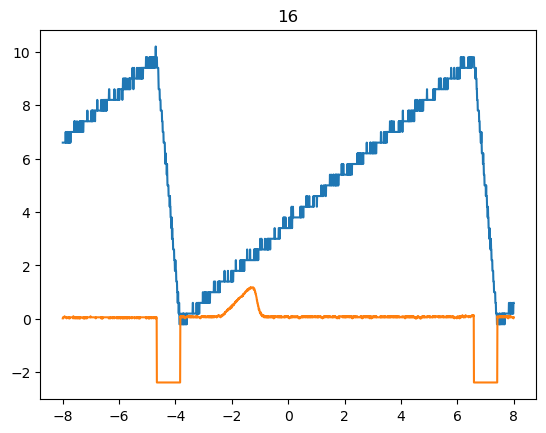

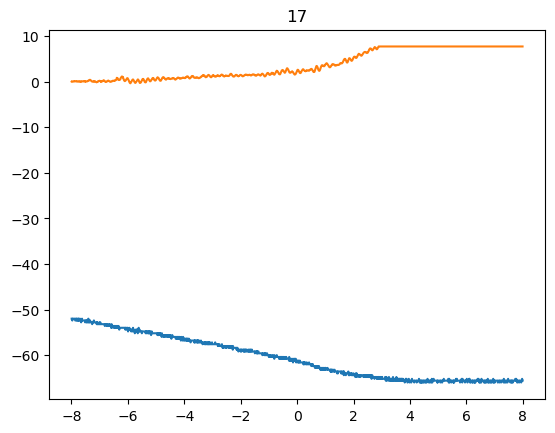

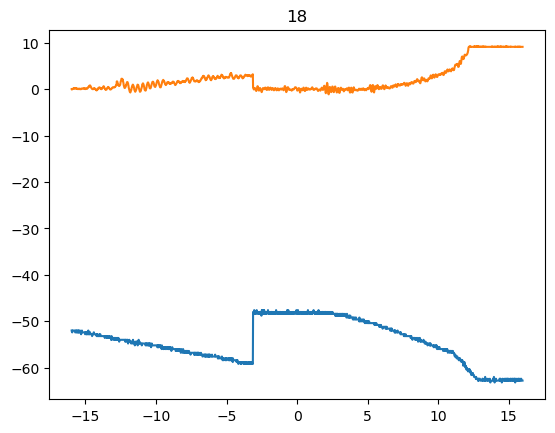

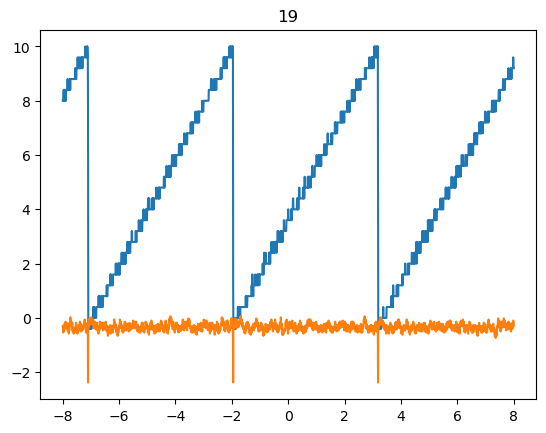

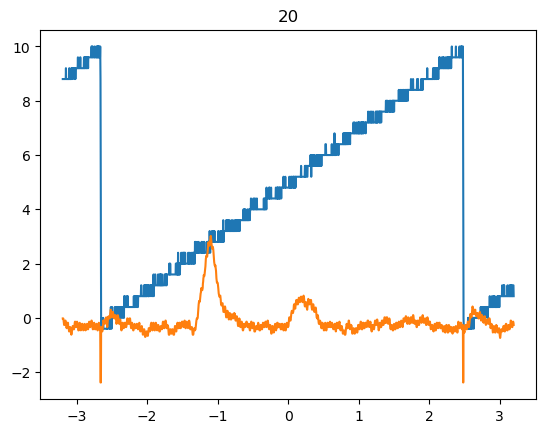

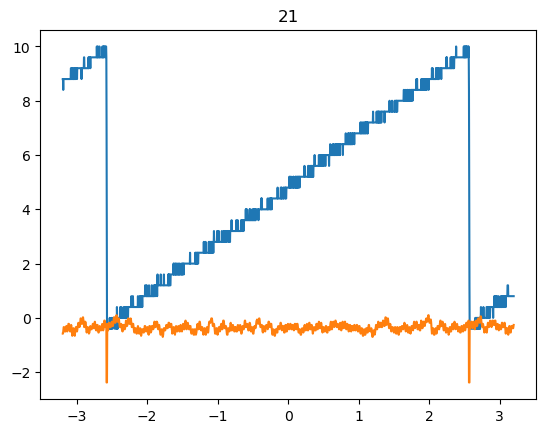

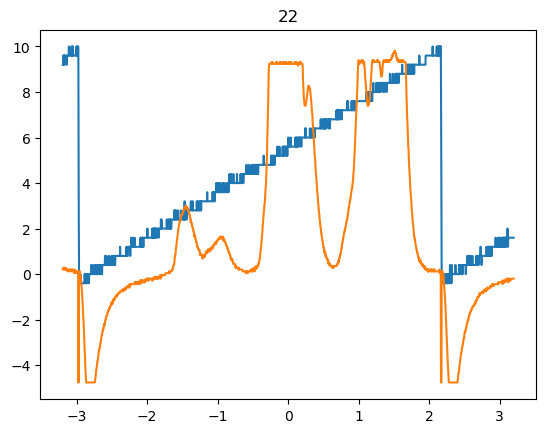

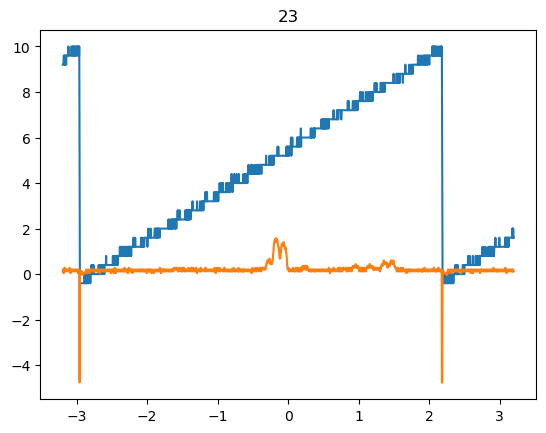

Length mismatch: Expected axis has 2 elements, new values have 3 elements


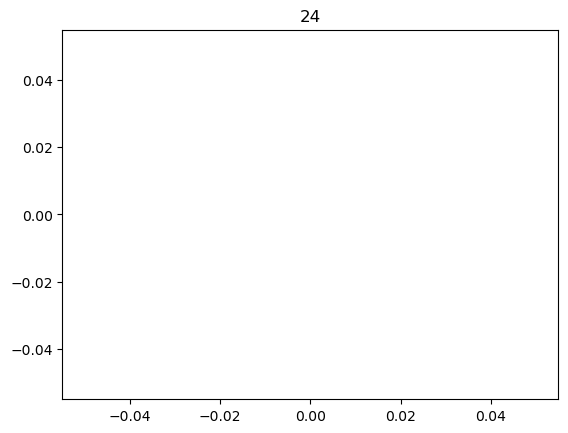

Length mismatch: Expected axis has 2 elements, new values have 3 elements


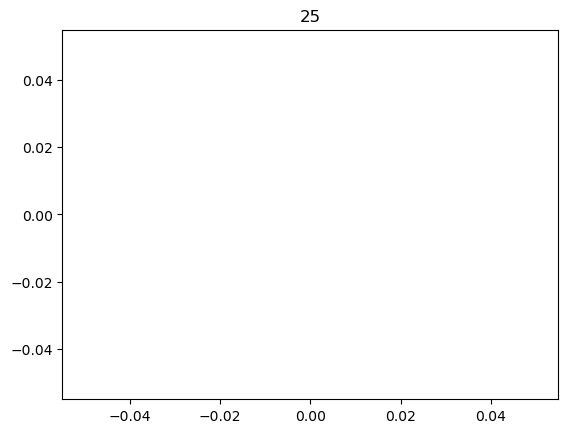

Length mismatch: Expected axis has 2 elements, new values have 3 elements


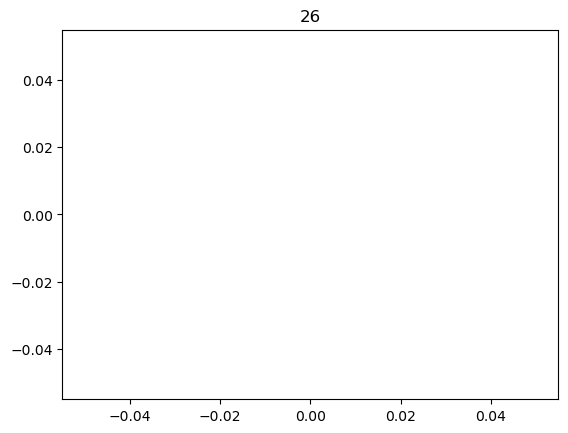

Length mismatch: Expected axis has 2 elements, new values have 3 elements


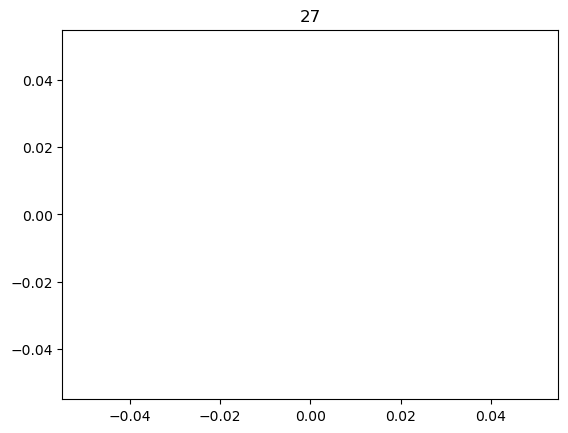

Length mismatch: Expected axis has 2 elements, new values have 3 elements


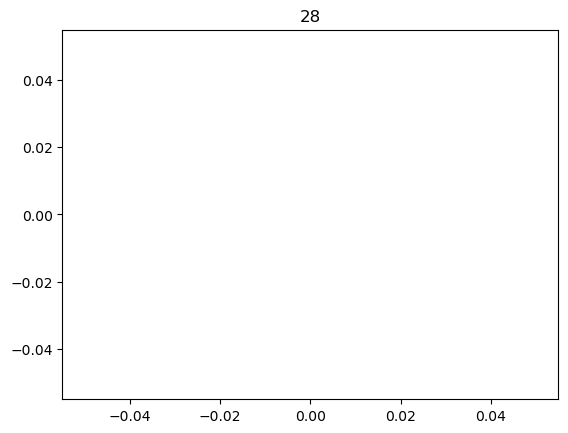

Length mismatch: Expected axis has 2 elements, new values have 3 elements


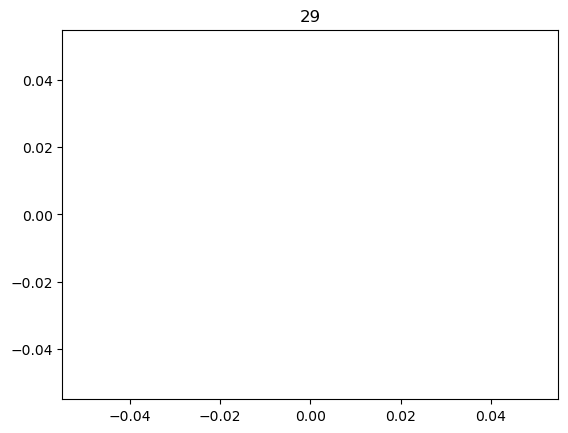

Length mismatch: Expected axis has 2 elements, new values have 3 elements


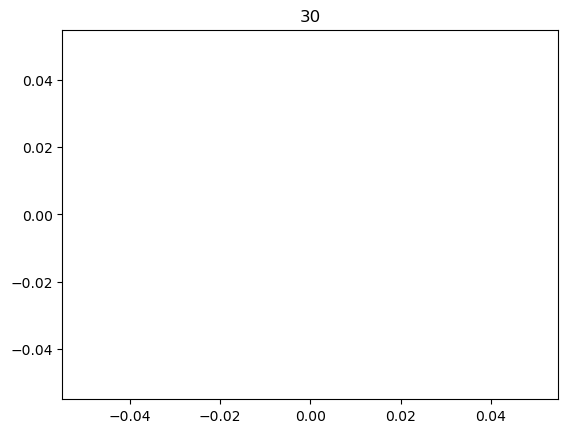

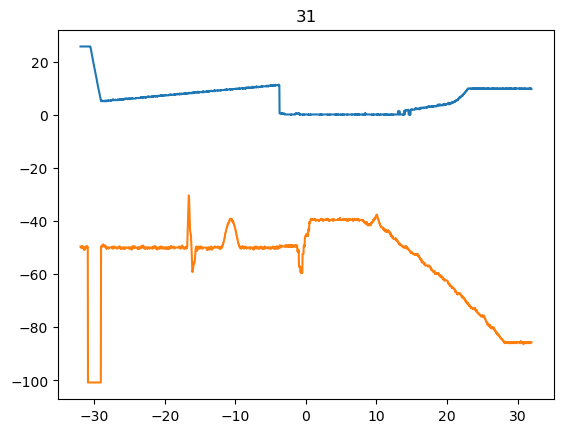

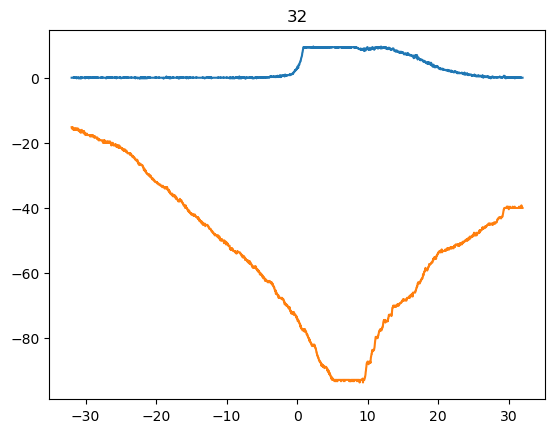

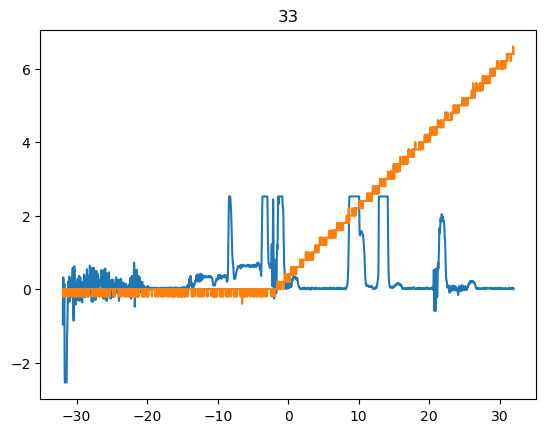

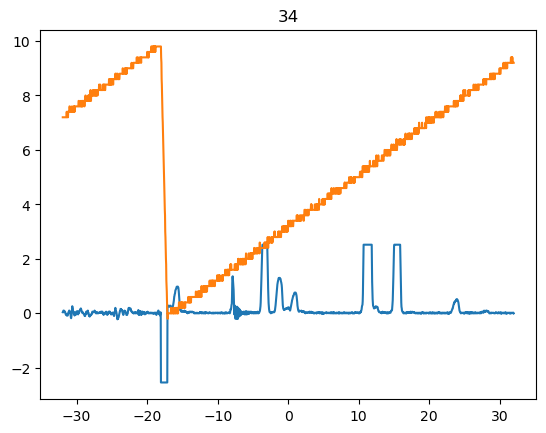

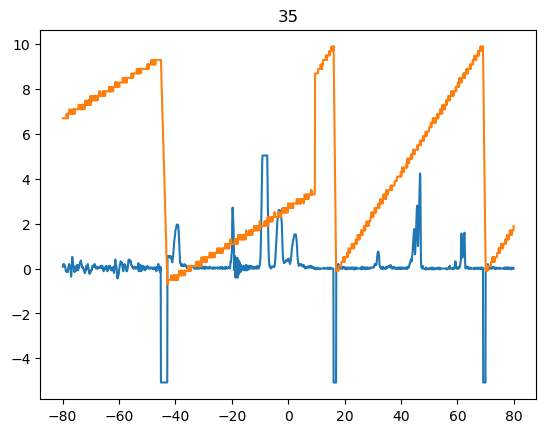

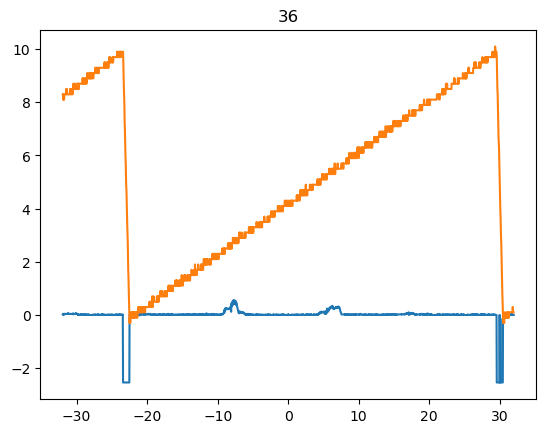

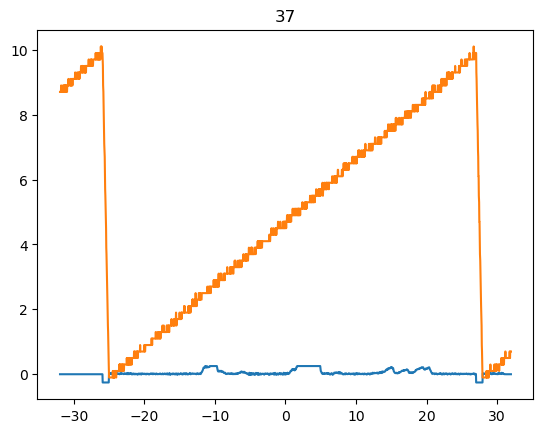

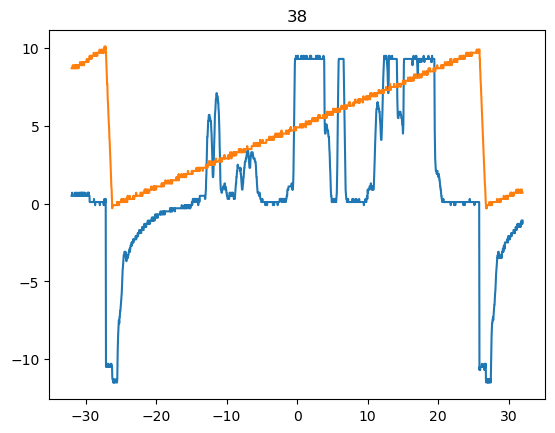

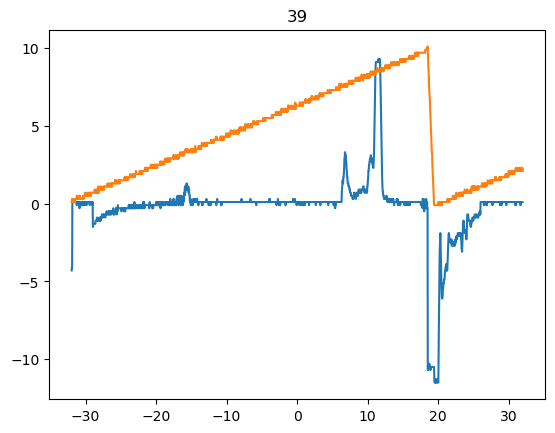

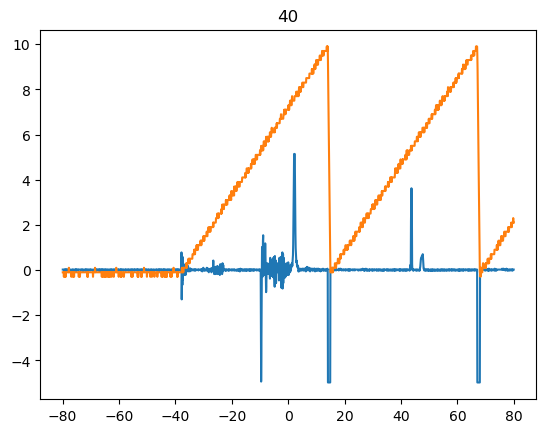

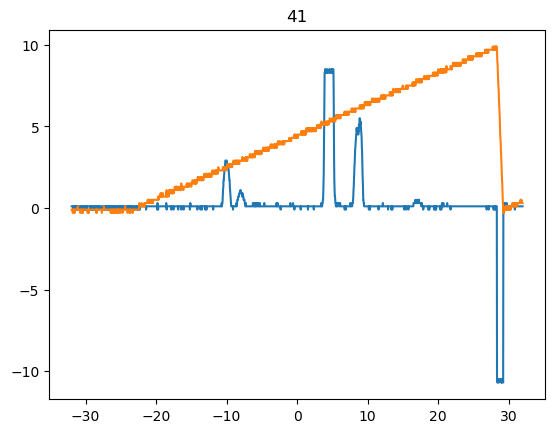

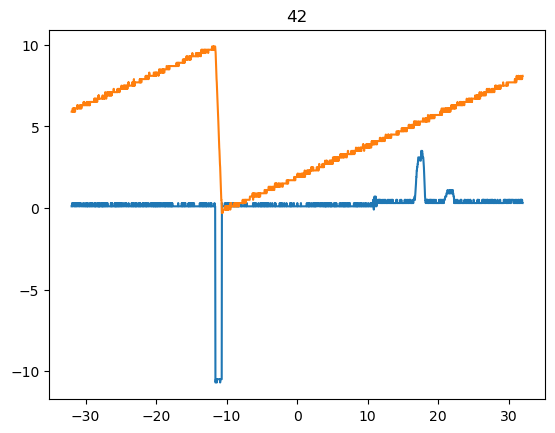

In [4]:
#pressure inside the camber at 9.0*10^-8 mBar
def read_Tek(n, cutoff=[0,1]):
    if n<10:
        file = Path().resolve() / f"TEK0000{n}.CSV"
    else:
        file = Path().resolve() / f"TEK000{n}.CSV"
    try:    
        data=pd.read_csv(file,skiprows=16)
        data=data.set_axis(["time", "Ch1","Ch2"],axis=1)
        length=len(data["time"])
        data = data.iloc[int(length*cutoff[0]):int(length*cutoff[1])]
        return data

    
    except Exception as e:
        print(e)
        return pd.DataFrame(0, index=range(2), columns=["time", "Ch1","Ch2"])

for n in range(0,10):


    data1= read_Tek(n)
    plt.title(n)
    plt.plot(data1["time"],data1["Ch1"])
    plt.plot(data1["time"],data1["Ch2"])
    plt.show()
    #plt.plot(data1["Ch1"],data1["Ch2"],".r")
for n in range(10,43):
    data1= read_Tek(n)
    plt.title(n)
    plt.plot(data1["time"],data1["Ch1"])
    plt.plot(data1["time"],data1["Ch2"])
    plt.show()
    #plt.plot(data1["Ch1"],data1["Ch2"],".r")


[142, 293]


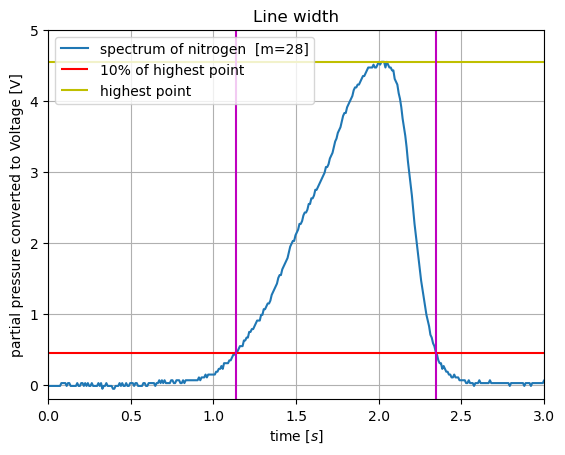

1.208


In [ ]:
percentage= 10


width_percent = read_Tek(15,[0.5,0.7])
x_offset=min(width_percent["Ch2"])+0.05
plt.plot(width_percent["time"],width_percent["Ch2"]-x_offset,label="spectrum of nitrogen  [m=28]")


percentage_height=max(width_percent["Ch2"]-x_offset)*percentage/100
plt.hlines(percentage_height,0,3.5,"r", label=f"{percentage}% of highest point")
plt.hlines(max(width_percent["Ch2"]-x_offset),0,3.5,"y",label="highest point")

peaks=[np.argmin(np.abs(percentage_height-width_percent["Ch2"]+x_offset)[0:200]),np.argmin(np.abs(percentage_height-width_percent["Ch2"]+x_offset)[200:])+200]
print(peaks)
time = np.array(width_percent["time"])

plt.vlines(time[peaks],-1,5,"m")
plt.xlim(0,3)
plt.ylim(-0.2,5)
plt.title("Line width")
plt.grid(69)
plt.legend()
plt.ylabel("partial pressure converted to Voltage [V]")
plt.xlabel("time [$s$]")
plt.show()

print(time[peaks[1]]-time[peaks[0]])






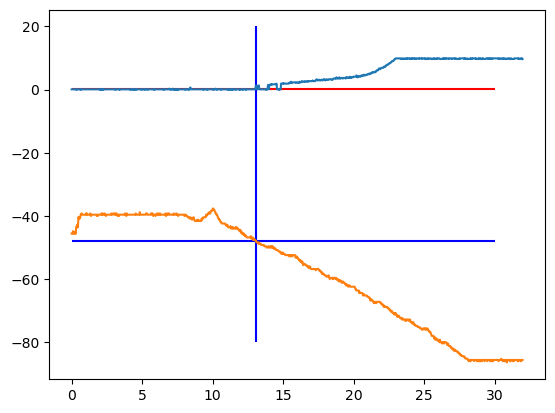

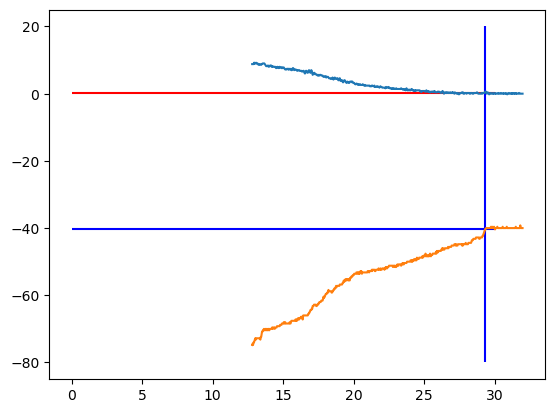

In [ ]:
# 14m  disso Tek 32

# 28m  disso Tek 33

m14 = read_Tek(31,[0.5,1])

# plt.plot(m14["Ch2"],m14["Ch1"])

# plt.show()


threshold=0.2
g=np.where(m14["Ch1"] > threshold)[0]
v=np.array(m14["Ch2"])
t=np.array(m14["time"])

plt.hlines(threshold,0,30,"r")
plt.hlines(v[g[4]],0,30,"b")
plt.vlines(t[g[4]],-80,20,"b")

plt.plot(m14["time"],m14["Ch1"])
plt.plot(m14["time"],m14["Ch2"])

plt.show()



m28 = read_Tek(32,[0.7,1])


threshold=0.2
g=np.where(m28["Ch1"] > threshold)[0]
v=np.array(m28["Ch2"])
t=np.array(m28["time"])

plt.hlines(threshold,0,30,"r")
plt.hlines(v[g[-4]],0,30,"b")
plt.vlines(t[g[-4]],-80,20,"b")

plt.plot(m28["time"],m28["Ch1"])
plt.plot(m28["time"],m28["Ch2"])

plt.show()
#plt.plot(m28["Ch2"],m28["Ch1"])


In [ ]:
4.6*10^-5


Alkan 
Anregungsenergie 20V 

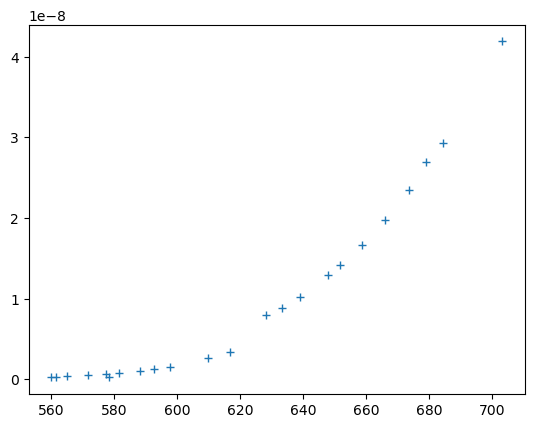

In [ ]:
#Raumptemperatur 24°C

# 310K = 2V
# 740K = 26V
def v_to_t(v,kelvin=False):
#     310K = 2V
# 740K = 26V
    dV=24
    dK=430
    c=274.16
    if kelvin:
        return dK/dV*v+c

    return dK/dV*v+c-273.15

p_t=np.array([[16.98, 0.22e-9], [23.95, 4.19e-8], [22.90, 2.93e-8], [22.60, 2.69e-8], [22.30, 2.35e-8], [21.88, 1.98e-8], [21.47, 1.67e-8], [21.07, 1.42e-8],  [20.87, 1.29e-8], [20.37,  1.02e-8], [20.05, 0.89e-8], [19.76, 0.80e-8],  [19.13, 3.36e-9], [18.74, 2.63e-9], [18.06, 1.57e-9], [17.77, 1.27e-9], [17.52, 1.07e-9], [17.15,  0.80e-9], [16.92, 0.65e-9], [16.61, 0.53e-9], [16.23, 0.40e-9], [16.03,  0.31e-9],  [15.95, 0.28e-9]])


c:\Users\jonah\anaconda3\envs\pua\Lib\site-packages\scipy\_lib\_finite_differences.py:145: RuntimeWarning: invalid value encountered in divide
  return val / prod((dx,) * n, axis=0)


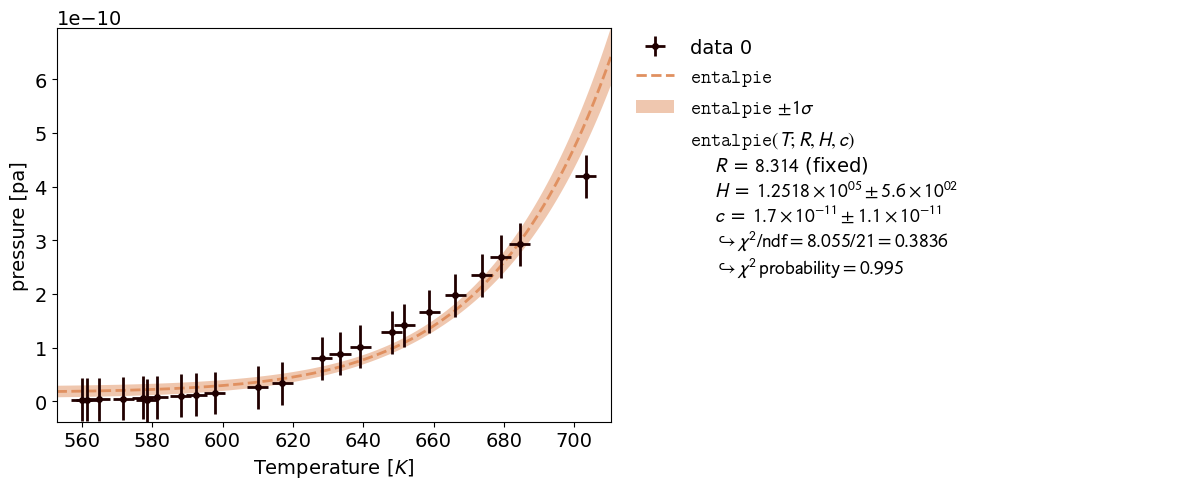

c:\Users\jonah\anaconda3\envs\pua\Lib\site-packages\scipy\_lib\_finite_differences.py:145: RuntimeWarning: invalid value encountered in divide
  return val / prod((dx,) * n, axis=0)


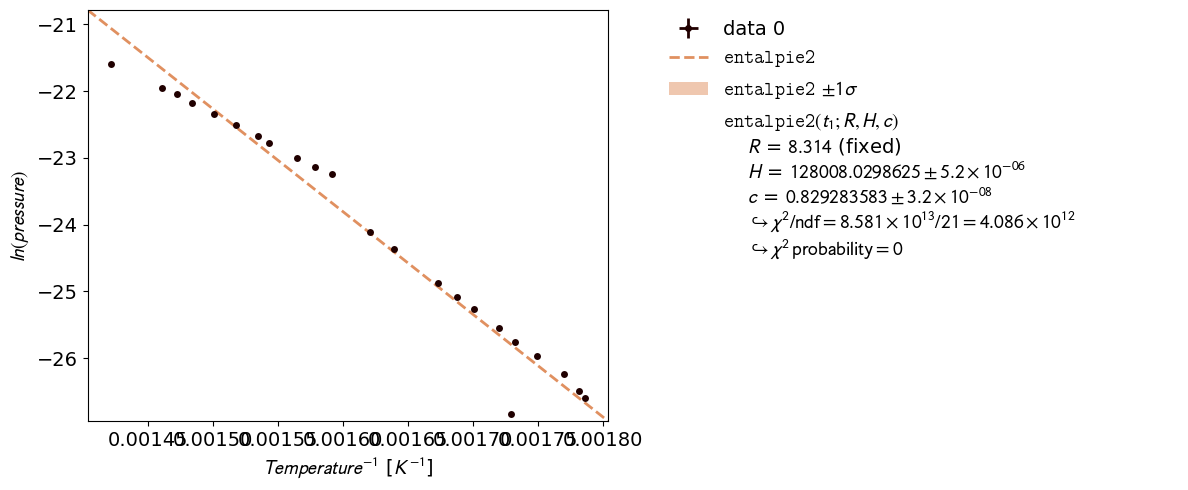

In [ ]:
def entalpie(T,R,H=10000,c=0):
    return np.exp(-H/(R*(T)))+c

data = kafe2.XYContainer(v_to_t(p_t[:,0],kelvin=True),p_t[:,1]/100)
data.add_error('y',0.04e-9)
data.add_error('x',3)

fit = kafe2.Fit(data,entalpie)
fit.fix_parameter("R", 8.314)

fit.do_fit()
pl = kafe2.Plot(fit)
pl.y_label = 'pressure [pa]'
pl.x_label = 'Temperature [$K$]'
pl.plot()

plt.show()


## example for a linear fit the errors are kind of pointless

def entalpie2(t_1,R,H,c):
    return  -H*t_1/R+c
data = kafe2.XYContainer(1/v_to_t(p_t[:,0],kelvin=True),np.log(p_t[:,1]/100))
data.add_error('y',0.01e-9)
data.add_error('x',0.01e-9)

fit = kafe2.Fit(data,entalpie2)
fit.fix_parameter("R", 8.314)

fit.do_fit()
pl = kafe2.Plot(fit)
pl.y_label = '$ln(pressure) $'
pl.x_label = '$Temperature^{-1}$ [$K^{-1}$]'
pl.plot()
plt.show()
